In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time

df = pd.read_excel("assignment_submission_report.xlsx")

df["submission_datetime"] = pd.to_datetime(df["submission_datetime"])
df["deadline"] = pd.to_datetime(df["deadline"])


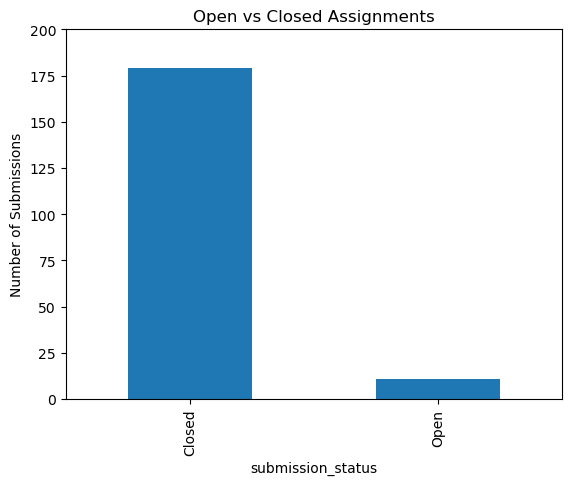

In [31]:
# 1. Open vs Closed Assignments

status_counts = df["submission_status"].value_counts()

plt.figure()
status_counts.plot(kind="bar")
plt.ylim(0,200)
plt.ylabel("Number of Submissions")
plt.title("Open vs Closed Assignments")
plt.show()


In [37]:
# 2. Students with atleast 1 and 2 missing assignments

all_assignments = df["assignment_number"].unique()
total_assignments = len(all_assignments)

submitted_counts = (
    df[df["submission_status"] == "Closed"]
    .groupby("student_name")["assignment_number"]
    .nunique()
)

missing_counts = total_assignments - submitted_counts
missing_counts = missing_counts.fillna(total_assignments)

students_all = missing_counts[missing_counts == 0].index.tolist()
students_missing_1 = missing_counts[missing_counts >= 1].index.tolist()
students_missing_2 = missing_counts[missing_counts >= 2].index.tolist()


In [34]:
# 3. Average & Mode Submission Time per Student

df["submission_time"] = df["submission_datetime"].dt.time

def to_seconds(t):
    return t.hour*3600 + t.minute*60 + t.second

def avg_time(times):
    avg = np.mean([to_seconds(t) for t in times])
    return time(int(avg//3600), int((avg%3600)//60))

time_stats = (
    df.groupby("student_name")["submission_time"]
    .agg(
        average_time=avg_time,
        mode_time=lambda x: x.mode().iloc[0] if not x.mode().empty else None
    )
)


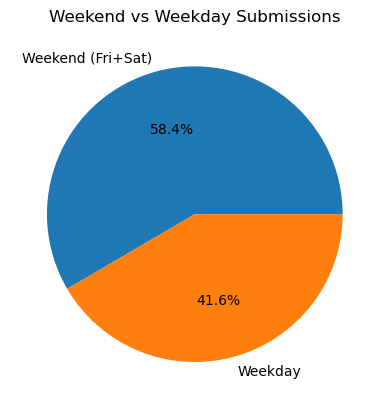

In [35]:
# 4. Weekend vs Weekday Submissions

df["weekday"] = df["submission_datetime"].dt.weekday
df["is_weekend"] = df["weekday"].isin([4, 5])

weekend_counts = df["is_weekend"].value_counts()

plt.figure()
weekend_counts.rename(
    {True: "Weekend (Fri+Sat)", False: "Weekday"}
).plot(kind="pie", autopct="%1.1f%%")
plt.title("Weekend vs Weekday Submissions")
plt.ylabel("")
plt.show()


In [40]:
# Export All Results to Excel

with pd.ExcelWriter("assignment_analysis_report.xlsx", engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Cleaned_Data", index=False)

    status_counts.to_frame("Count").to_excel(
        writer, sheet_name="Open_vs_Closed"
    )

    pd.DataFrame({
        "Submitted_All": pd.Series(students_all),
        "Missing_AtLeast_1": pd.Series(students_missing_1),
        "Missing_AtLeast_2": pd.Series(students_missing_2)
    }).to_excel(writer, sheet_name="Missing_Assignments", index=False)

    time_stats.to_excel(writer, sheet_name="Submission_Times")

    weekend_counts.rename(
        {True: "Weekend (Fri+Sat)", False: "Weekday"}
    ).to_frame("Count").to_excel(writer, sheet_name="Weekend_Stats")

print("Report written to: assignment_analysis_report.xlsx")


Report written to: assignment_analysis_report.xlsx
